In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas_profiling as pp
import seaborn as sns
import phik

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/train_clean.csv')
data.head()

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=100)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_train_std, y_train)

lin_r2 = r2_score(y_test, lin_reg.predict(X_test_std))
print(f'R2 score: {lin_r2}')

R2 score: 0.8320597532023871


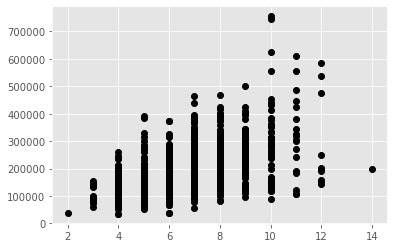

In [3]:
plt.plot(data['TotRmsAbvGrd'], data['SalePrice'], 'ko')

In [4]:
if False:
    param_grid = {
        "penalty": ["l2", "l1", "elasticnet"],
        "alpha": [10 ** i for i in range(-9, -5)],
        "learning_rate": ["constant", "adaptive", "optimal", "invscaling"]
    }

    sgd_reg = SGDRegressor(max_iter=10_000)

    grid = GridSearchCV(sgd_reg, param_grid, cv=5, verbose=1)
    grid.fit(X_train_std, y_train)

    print(grid.best_score_)
    print(grid.best_params_)

In [5]:
best_params = {
    'alpha': 1e-08, 
    'learning_rate': 'invscaling', 
    'penalty': 'elasticnet'
}

# sgd_reg = SGDRegressor(max_iter=10_000, **grid.best_params_)
sgd_reg = SGDRegressor(max_iter=10_000, **best_params)
sgd_reg.fit(X_train_std, y_train)
sgd_r2 = r2_score(y_test, sgd_reg.predict(X_test_std))
print(sgd_r2)
print(lin_r2)

0.8241024353784401
0.8320597532023871


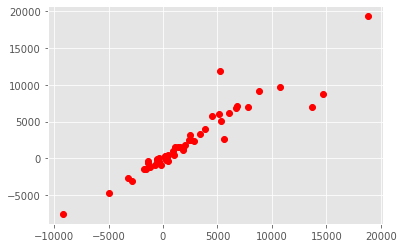

In [6]:
plt.plot(lin_reg.coef_, sgd_reg.coef_, 'ro')

In [7]:
np.linspace(5_000, 10_000, 3)

array([ 5000.,  7500., 10000.])

In [8]:
param_grid = {
    "C": range(350, 400, 5),
    "epsilon": np.linspace(2_500, 3_000, 10)
}

svr = SVR(kernel='linear')

grid = GridSearchCV(svr, param_grid, cv=5, verbose=1)
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   30.5s finished


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': range(350, 400, 5),
                         'epsilon': array([2500.        , 2555.55555556, 2611.11111111, 2666.66666667,
       2722.22222222, 2777.77777778, 2833.33333333, 2888.88888889,
       2944.44444444, 3000.        ])},
             verbose=1)

In [9]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 360, 'epsilon': 2888.8888888888887}
0.7974196958535714


In [13]:
svr = SVR(kernel='linear', **grid.best_params_)
svr.fit(X_train_std, y_train)
svr_r2 = r2_score(y_test, svr.predict(X_test_std))

In [14]:
print(f'Linear regression: {lin_r2}')
print(f'SGD regression: {sgd_r2}')
print(f'SVR: {svr_r2}')

Linear regression: 0.8320597532023871
SGD regression: 0.8241024353784401
SVR: 0.8362923115756742
